# Flood Risk 

In [1]:
pip install rasterio matplotlib numpy


     |████████████████████████████████| 21.8 MB 8.0 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [8]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

path = "data/elv_n30e000/n30e020_elv.tif"

with rasterio.open(path) as src:
    dem = src.read(1)          # Höhenmatrix (2D)
    transform = src.transform  # Geo-Informationen
    crs = src.crs              # Koordinaten-System

print("CRS:", crs)
print("Transform:", transform)
print("Shape:", dem.shape)

CRS: EPSG:4326
Transform: | 0.00, 0.00, 20.00|
| 0.00,-0.00, 35.00|
| 0.00, 0.00, 1.00|
Shape: (6000, 6000)


In [19]:
import rasterio

path = "data/elv_n30e000/n30e020_elv.tif"

with rasterio.open(path) as src:
    bounds = src.bounds
    crs = src.crs

print("CRS:", crs)
print("Bounds:", bounds)

CRS: EPSG:4326
Bounds: BoundingBox(left=19.999583333333334, bottom=29.999583333333334, right=24.999583333333334, top=34.999583333333334)


In [9]:
print("Min Höhe:", dem.min())
print("Max Höhe:", dem.max())
print("Durchschnitt:", dem.mean())
print("Standardabweichung:", dem.std())

Min Höhe: -9999.0
Max Höhe: 879.8
Durchschnitt: -5004.8604
Standardabweichung: 5076.721


In [14]:
dem = np.where(dem < 0, np.nan, dem)

In [15]:
print("Min Höhe:", dem.min())
print("Max Höhe:", dem.max())
print("Durchschnitt:", dem.mean())
print("Standardabweichung:", dem.std())

Min Höhe: nan
Max Höhe: nan
Durchschnitt: nan
Standardabweichung: nan


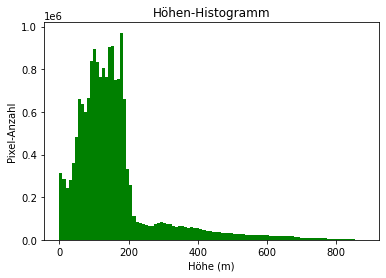

In [16]:
plt.hist(dem.flatten(), bins=100, color='green')
plt.title("Höhen-Histogramm")
plt.xlabel("Höhe (m)")
plt.ylabel("Pixel-Anzahl")
plt.show()

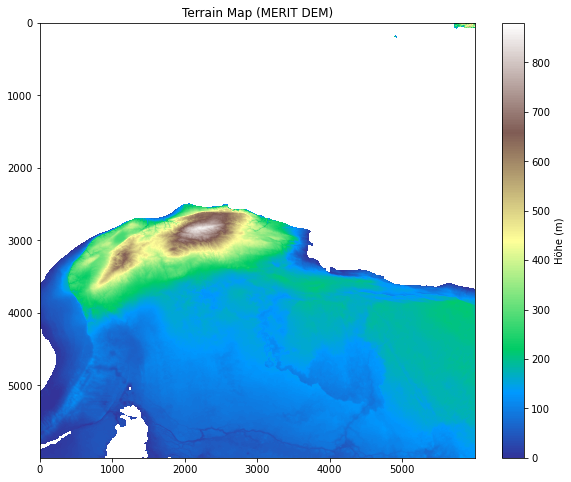

In [17]:
plt.figure(figsize=(10,8))
plt.imshow(dem, cmap="terrain")
plt.colorbar(label="Höhe (m)")
plt.title("Terrain Map (MERIT DEM)")
plt.show()

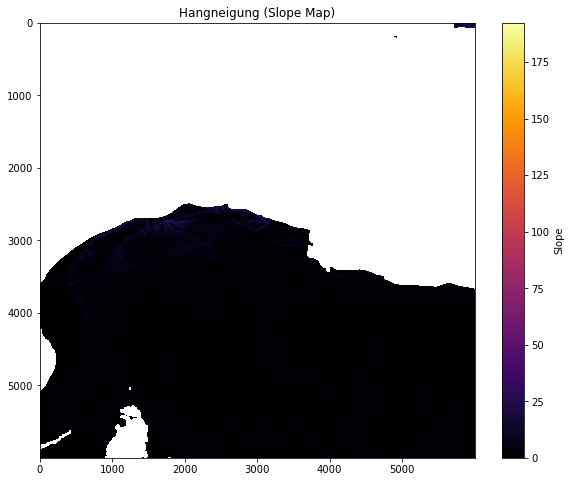

In [18]:
dy, dx = np.gradient(dem)
slope = np.sqrt(dx**2 + dy**2)

plt.figure(figsize=(10,8))
plt.imshow(slope, cmap="inferno")
plt.colorbar(label="Slope")
plt.title("Hangneigung (Slope Map)")
plt.show()